# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp =  city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind =  city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)
    
    # Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | mugia
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | greenland
Processing Record 6 of Set 1 | port douglas
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | brookings
Processing Record 9 of Set 1 | whitehorse
Processing Record 10 of Set 1 | atafu village
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | fonadhoo
City not found. Skipping...
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | kiunga
Processing Record 15 of Set 1 | queenstown
Processing Record 16 of Set 1 | st. john's
Processing Record 17 of Set 1 | aykhal
Processing Record 18 of Set 1 | uturoa
Processing Record 19 of Set 1 | bargara
City not found. Skipping...
Processing Record 20 of Set 1 | urangan
Processing Record 21 of Set 1 | tranovaho
City not found.

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,295.59,84,100,11.43,PN,1722447631
1,olonkinbyen,70.9221,-8.7187,278.91,99,99,2.90,SJ,1722447687
2,mugia,43.1041,-9.2179,294.35,91,43,1.83,ES,1722447688
3,kodiak,57.7900,-152.4072,288.88,51,0,8.75,US,1722447689
4,greenland,43.0362,-70.8328,299.98,76,75,4.12,US,1722447690


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,295.59,84,100,11.43,PN,1722447631
1,olonkinbyen,70.9221,-8.7187,278.91,99,99,2.90,SJ,1722447687
2,mugia,43.1041,-9.2179,294.35,91,43,1.83,ES,1722447688
3,kodiak,57.7900,-152.4072,288.88,51,0,8.75,US,1722447689
4,greenland,43.0362,-70.8328,299.98,76,75,4.12,US,1722447690


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

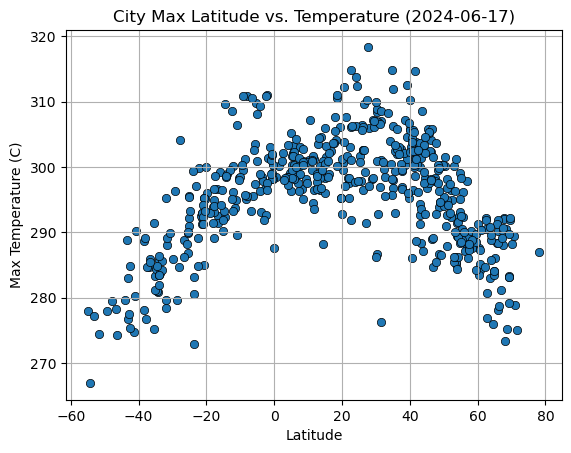

In [11]:
# Build scatter plot for latitude vs. temperature
x_axis=city_data_df["Lat"]
y_axis=city_data_df["Max Temp"]
plt.scatter(x_axis,y_axis,marker="o",edgecolor='black', linewidths=0.5)

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2024-06-17)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

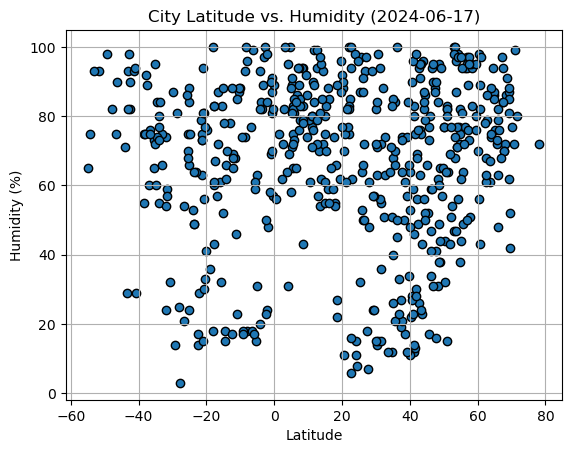

In [12]:
# Build the scatter plots for latitude vs. humidity
x_axis=city_data_df["Lat"]
y_axis=city_data_df["Humidity"]

plt.scatter(x_axis,y_axis,marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2024-06-17)")
        

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

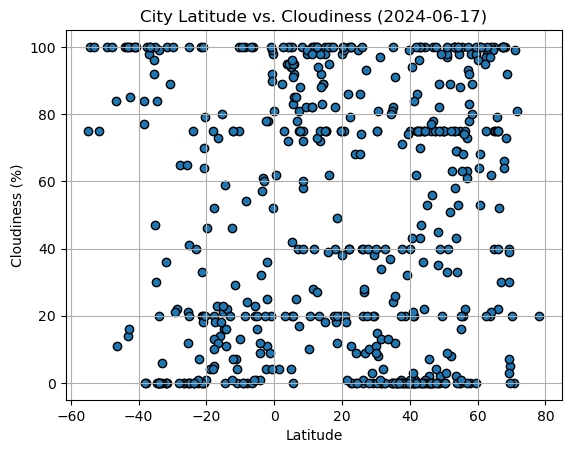

In [13]:
# Build the scatter plots for latitude vs. cloudiness
x_axis=city_data_df["Lat"]
y_axis=city_data_df["Cloudiness"]
plt.scatter(x_axis,y_axis,marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2024-06-17)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

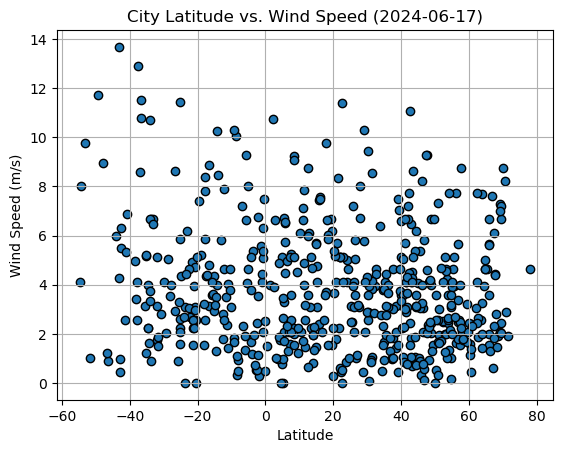

In [14]:
# Build the scatter plots for latitude vs. wind speed
x_axis=city_data_df["Lat"]
y_axis=city_data_df["Wind Speed"]
plt.scatter(x_axis,y_axis,marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024-06-17)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, x_label, y_label, title):

    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Get regression line values
    regress_values = x_values * slope + intercept
    line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    x_min = x_values.min()
    y_min = y_values.min()
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,(x_min, y_min),fontsize= 15,color="red")
    
    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Show the regression line equation
    plt.show()
    
    return r_value 

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,olonkinbyen,70.9221,-8.7187,278.91,99,99,2.90,SJ,1722447687
2,mugia,43.1041,-9.2179,294.35,91,43,1.83,ES,1722447688
3,kodiak,57.7900,-152.4072,288.88,51,0,8.75,US,1722447689
4,greenland,43.0362,-70.8328,299.98,76,75,4.12,US,1722447690
7,brookings,44.3114,-96.7984,302.80,82,75,3.60,US,1722447694


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,295.59,84,100,11.43,PN,1722447631
5,port douglas,-16.4833,145.4667,292.53,87,73,4.80,AU,1722447691
6,avarua,-21.2078,-159.7750,292.18,63,20,1.54,CK,1722447692
9,atafu village,-8.5421,-172.5159,301.19,74,100,10.04,TK,1722447696
10,port-aux-francais,-49.3500,70.2167,277.92,98,100,11.72,TF,1722447647


###  Temperature vs. Latitude Linear Regression Plot

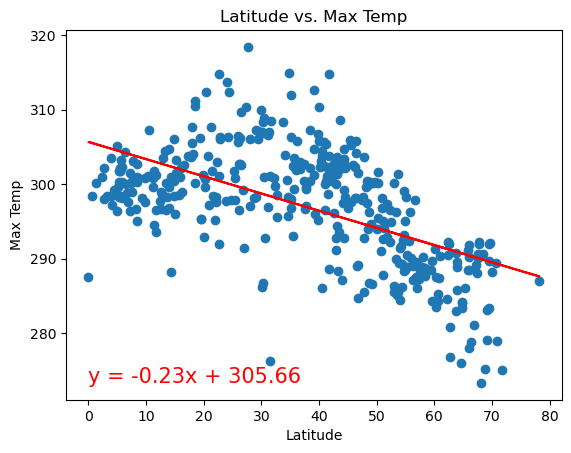

The r^2-value is: 0.33322870258746085


In [18]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]

# Get r_value from the plot function
r_value = linear_regression_plot(x_axis, y_axis, "Latitude", "Max Temp", "Latitude vs. Max Temp")
print(f"The r^2-value is: {r_value**2}")




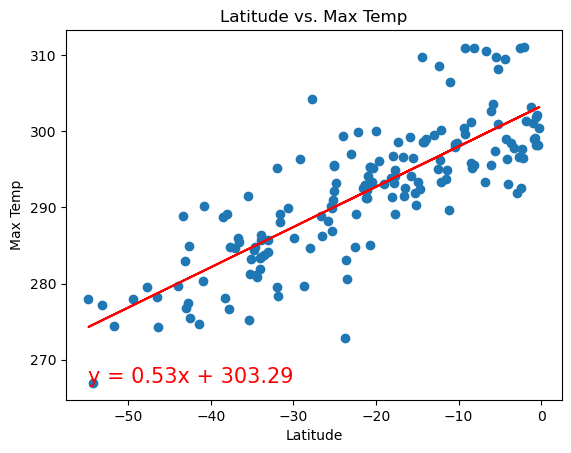

The r^2-value is: 0.6649408099942968


In [19]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Max Temp"]

# Get r_value from the plot function
r_value = linear_regression_plot(x_axis, y_axis, "Latitude", "Max Temp", "Latitude vs. Max Temp")
print(f"The r^2-value is: {r_value**2}")




**Discussion about the linear relationship:** 

Northern Hemisphere 
r squared Value: 0.33
Interpretation: This r squared value suggests that approximately 33% of the variance in max temperature can be explained by latitude in the Northern Hemisphere. This indicates a weaker linear relationship compared to the Southern Hemisphere.

Southern Hemisphere 
r squared Value: 0.67
Interpretation: This r squared value suggests that approximately 67% of the variance in max temperature can be explained by the latitude in the Southern Hemisphere. This indicates a moderate to strong linear relationship between latitude and max temperature in this region.



### Humidity vs. Latitude Linear Regression Plot

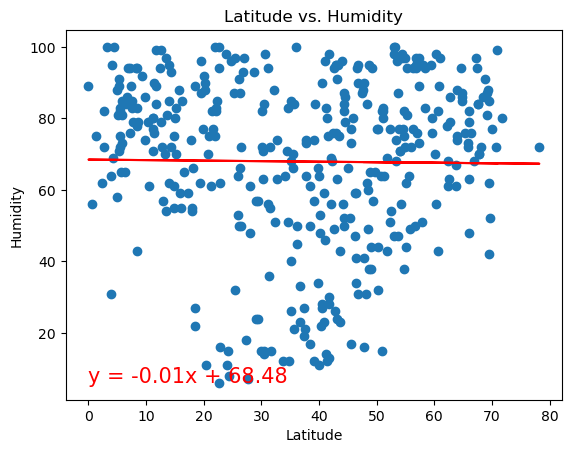

The r^2-value is: 0.0001434456398875524


In [26]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Humidity"]

# Get r_value from the plot function
r_value = linear_regression_plot(x_axis, y_axis, "Latitude", "Humidity", "Latitude vs. Humidity")
print(f"The r^2-value is: {r_value**2}")


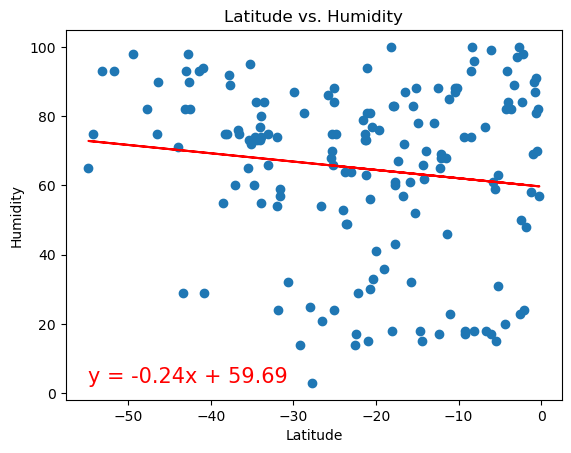

The r^2-value is: 0.0177914135923471


In [27]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Humidity"]

# Get r_value from the plot function
r_value = linear_regression_plot(x_axis, y_axis, "Latitude", "Humidity", "Latitude vs. Humidity")
print(f"The r^2-value is: {r_value**2}")

**Discussion about the linear relationship:** 

Both r squared values are close to zero, indicating that only about 0.017% (Southern Hemisphere) and 0.00014% (Northern Hemisphere) of the variance in humidity can be explained by latitude.
Such low r squared values suggest that there is virtually no linear relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

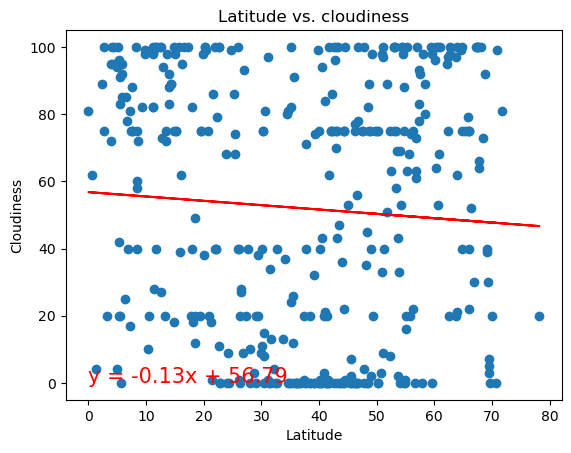

The r^2-value is: 0.004378877390396663


In [22]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Cloudiness"]

# Get r_value from the plot function
r_value = linear_regression_plot(x_axis, y_axis, "Latitude", "Cloudiness", "Latitude vs. cloudiness")
print(f"The r^2-value is: {r_value**2}")

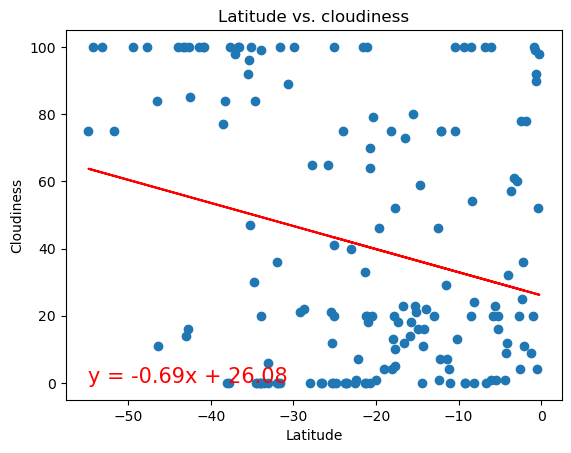

The r^2-value is: 0.06040030484625801


In [23]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Cloudiness"]

# Get r_value from the plot function
r_value = linear_regression_plot(x_axis, y_axis, "Latitude", "Cloudiness", "Latitude vs. cloudiness")
print(f"The r^2-value is: {r_value**2}")

**Discussion about the linear relationship:** 

Both r squared values are quite low, with 0.060 (0.06%) for the Southern Hemisphere and 0.0043 (0.43%) for the Northern Hemisphere.
These values suggest that only a very small fraction of the variance in cloudiness can be explained by latitude in both hemispheres.
The low r squared values indicate that there is no significant linear relationship between latitude and cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

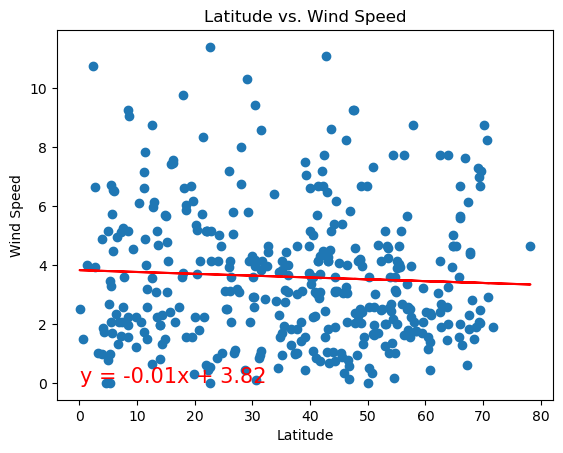

The r^2-value is: 0.002777341521841676


In [24]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Wind Speed"]

# Get r_value from the plot function
r_value = linear_regression_plot(x_axis, y_axis, "Latitude", "Wind Speed", "Latitude vs. Wind Speed")
print(f"The r^2-value is: {r_value**2}")


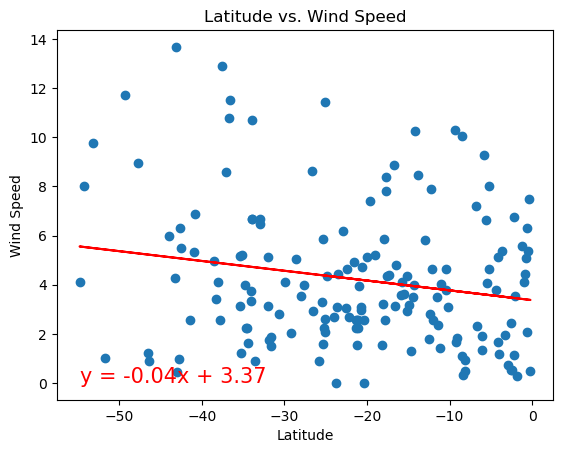

The r^2-value is: 0.037361225026180105


In [25]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Wind Speed"]

# Get r_value from the plot function
r_value = linear_regression_plot(x_axis, y_axis, "Latitude", "Wind Speed", "Latitude vs. Wind Speed")
print(f"The r^2-value is: {r_value**2}")

**Discussion about the linear relationship:** 

The r squared value for the Southern Hemisphere is approximately 0.0374 (3.74%), and for the Northern Hemisphere, it is around 0.0028 (0.28%).
These values indicate that only a very small percentage of the variance in wind speed can be explained by latitude in both hemispheres.
The low r squared values suggest a weak linear relationship between latitude and wind speed, meaning latitude alone does not significantly predict wind speed